In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

In [9]:
f = open('./data/perch.dat','rb')
perch = pickle.load(f)
f.close()

In [10]:
length, weight = perch

In [11]:
length.shape, weight.shape

((56,), (56,))

In [12]:
length2 = length.reshape(56,1)
length2.shape

(56, 1)

In [13]:
from sklearn.neighbors import KNeighborsRegressor

train_input, test_input, train_target, test_target = train_test_split(length2,weight)

for i in range(1,31):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(train_input,train_target)
    score = model.score(test_input, test_target)
    print(i,score)

1 0.8876285917988823
2 0.9361193654844703
3 0.9727440718339205
4 0.9650645041313446
5 0.9703291671753722
6 0.9699691532458142
7 0.9609595546231099
8 0.956501586198417
9 0.9373644398650046
10 0.9443135638743846
11 0.9187272431406849
12 0.9249270543584607
13 0.9231014526347733
14 0.9037129712351287
15 0.9017424358262489
16 0.9113059187049088
17 0.9156975379040794
18 0.9285563947393829
19 0.9214165199190769
20 0.9083022016647074
21 0.9164121235711659
22 0.9076568561024738
23 0.9011429282451842
24 0.8851277844130064
25 0.8709801791214961
26 0.8520393291551305
27 0.8290731309385753
28 0.8003844577925373
29 0.7721688256569188
30 0.736411968127283


In [14]:

model = KNeighborsRegressor(n_neighbors=10)
model.fit(train_input,train_target)
score = model.score(test_input, test_target)
score

0.9443135638743846

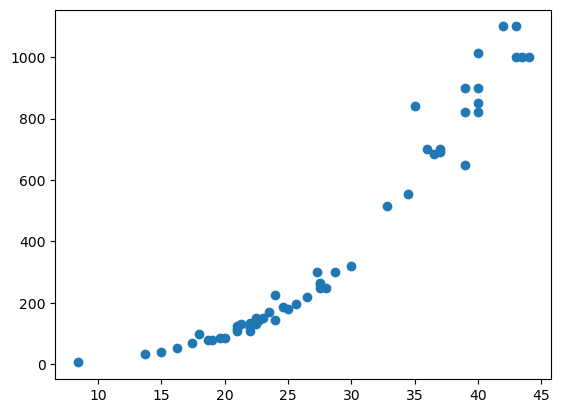

In [15]:
plt.scatter(length,weight)

In [16]:
model.predict([[40]])

array([894.])

In [17]:
# 선형회기 모델
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_input,train_target)
model.score(test_input, test_target)


0.8806977777887375

In [18]:
model.coef_

array([36.76063051])

In [19]:
model.intercept_

-626.6338634791114

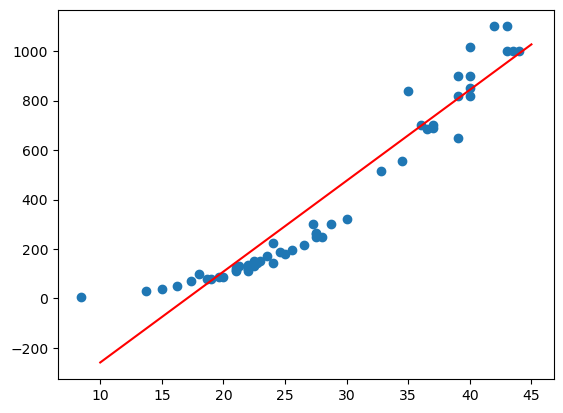

In [20]:
plt.scatter(length,weight)
plt.plot(range(10,46), model.coef_*range(10,46) + model.intercept_, 'red')

In [21]:
perch2 = pd.read_csv('./data/perch2.csv')
del perch2['Unnamed: 0']
perch2

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [22]:
import numpy as np

data = np.array(perch2)
target = weight

train_input, test_input, train_target, test_target = train_test_split(data,weight)

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean)/std
test_scaled = (test_input - mean)/std

model = LinearRegression()
model.fit(train_scaled, train_target)
model.score(test_scaled,test_target)

0.9335934593721074

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

fish2 = pd.read_csv('./data/fish2.csv')
data = fish2.iloc[:,1:]

target = fish2['Species'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data,target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled, train_target)
knn.score(test_scaled,test_target)

c:\Users\box15\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.825

In [28]:
knn.predict(test_scaled)

c:\Users\box15\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Perch', 'Smelt', 'Smelt', 'Bream', 'Perch', 'Bream', 'Perch',
       'Roach', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Bream',
       'Smelt', 'Roach', 'Bream', 'Perch', 'Smelt', 'Bream', 'Parkki',
       'Bream', 'Perch', 'Roach', 'Perch', 'Bream', 'Bream', 'Pike',
       'Perch', 'Perch', 'Roach', 'Bream', 'Bream', 'Pike', 'Perch',
       'Parkki', 'Roach', 'Bream', 'Pike', 'Parkki'], dtype=object)

In [31]:
np.round(knn.predict_proba(test_scaled),2)

array([[0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.67, 0.  , 0.33, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.67, 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.67, 0.  , 0.33, 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.67, 0.  , 0.33, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.67, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.67, 0.33, 0.  , 0.  ,

In [32]:
knn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [33]:
from sklearn.linear_model import LogisticRegression

fish2 = pd.read_csv('./data/fish2.csv')
data = fish2.iloc[:,1:]

target = fish2['Species'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data,target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

logi = LogisticRegression()
logi.fit(train_scaled, train_target)
logi.score(test_scaled,test_target)

0.875

In [34]:
logi.predict(test_scaled)

array(['Bream', 'Perch', 'Bream', 'Pike', 'Smelt', 'Perch', 'Perch',
       'Smelt', 'Perch', 'Bream', 'Perch', 'Parkki', 'Bream', 'Bream',
       'Bream', 'Pike', 'Perch', 'Smelt', 'Bream', 'Pike', 'Perch',
       'Perch', 'Perch', 'Smelt', 'Pike', 'Perch', 'Perch', 'Perch',
       'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Smelt',
       'Perch', 'Perch', 'Perch', 'Perch', 'Pike'], dtype=object)

In [36]:
np.round(logi.predict_proba(test_scaled),2)

array([[0.94, 0.02, 0.01, 0.  , 0.01, 0.  , 0.02],
       [0.09, 0.  , 0.75, 0.04, 0.01, 0.  , 0.11],
       [0.7 , 0.1 , 0.06, 0.02, 0.08, 0.  , 0.05],
       [0.  , 0.  , 0.05, 0.93, 0.  , 0.  , 0.02],
       [0.  , 0.04, 0.05, 0.  , 0.04, 0.87, 0.  ],
       [0.04, 0.  , 0.85, 0.02, 0.02, 0.  , 0.07],
       [0.  , 0.1 , 0.52, 0.01, 0.29, 0.06, 0.01],
       [0.  , 0.04, 0.07, 0.  , 0.06, 0.83, 0.  ],
       [0.02, 0.1 , 0.48, 0.02, 0.34, 0.01, 0.03],
       [0.92, 0.01, 0.02, 0.  , 0.01, 0.  , 0.04],
       [0.05, 0.06, 0.53, 0.05, 0.26, 0.  , 0.05],
       [0.12, 0.58, 0.07, 0.01, 0.19, 0.01, 0.02],
       [0.96, 0.01, 0.01, 0.  , 0.  , 0.  , 0.02],
       [0.85, 0.02, 0.05, 0.01, 0.02, 0.  , 0.05],
       [0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01],
       [0.01, 0.  , 0.11, 0.84, 0.02, 0.  , 0.03],
       [0.06, 0.  , 0.82, 0.02, 0.  , 0.  , 0.09],
       [0.  , 0.03, 0.05, 0.  , 0.04, 0.87, 0.  ],
       [0.85, 0.05, 0.02, 0.01, 0.04, 0.  , 0.03],
       [0.  , 0.  , 0.04, 0.95,

In [60]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt 
iris = load_iris()
data, target = iris['data'], iris['target']

train_input, test_input, train_target, test_target = train_test_split(data,target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

model = DecisionTreeClassifier()
model.fit(train_scaled,train_target)
model.score(test_scaled,test_target)

print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

1.0
0.9473684210526315


[Text(0.5, 0.9166666666666666, 'petal width (cm) <= -0.696\ngini = 0.663\nsamples = 112\nvalue = [32, 40, 40]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 0.679\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 0.603\ngini = 0.201\nsamples = 44\nvalue = [0, 39, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 0.541\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 0.404\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'petal length (cm) <= 0.899\ngini = 0.444\nsamples

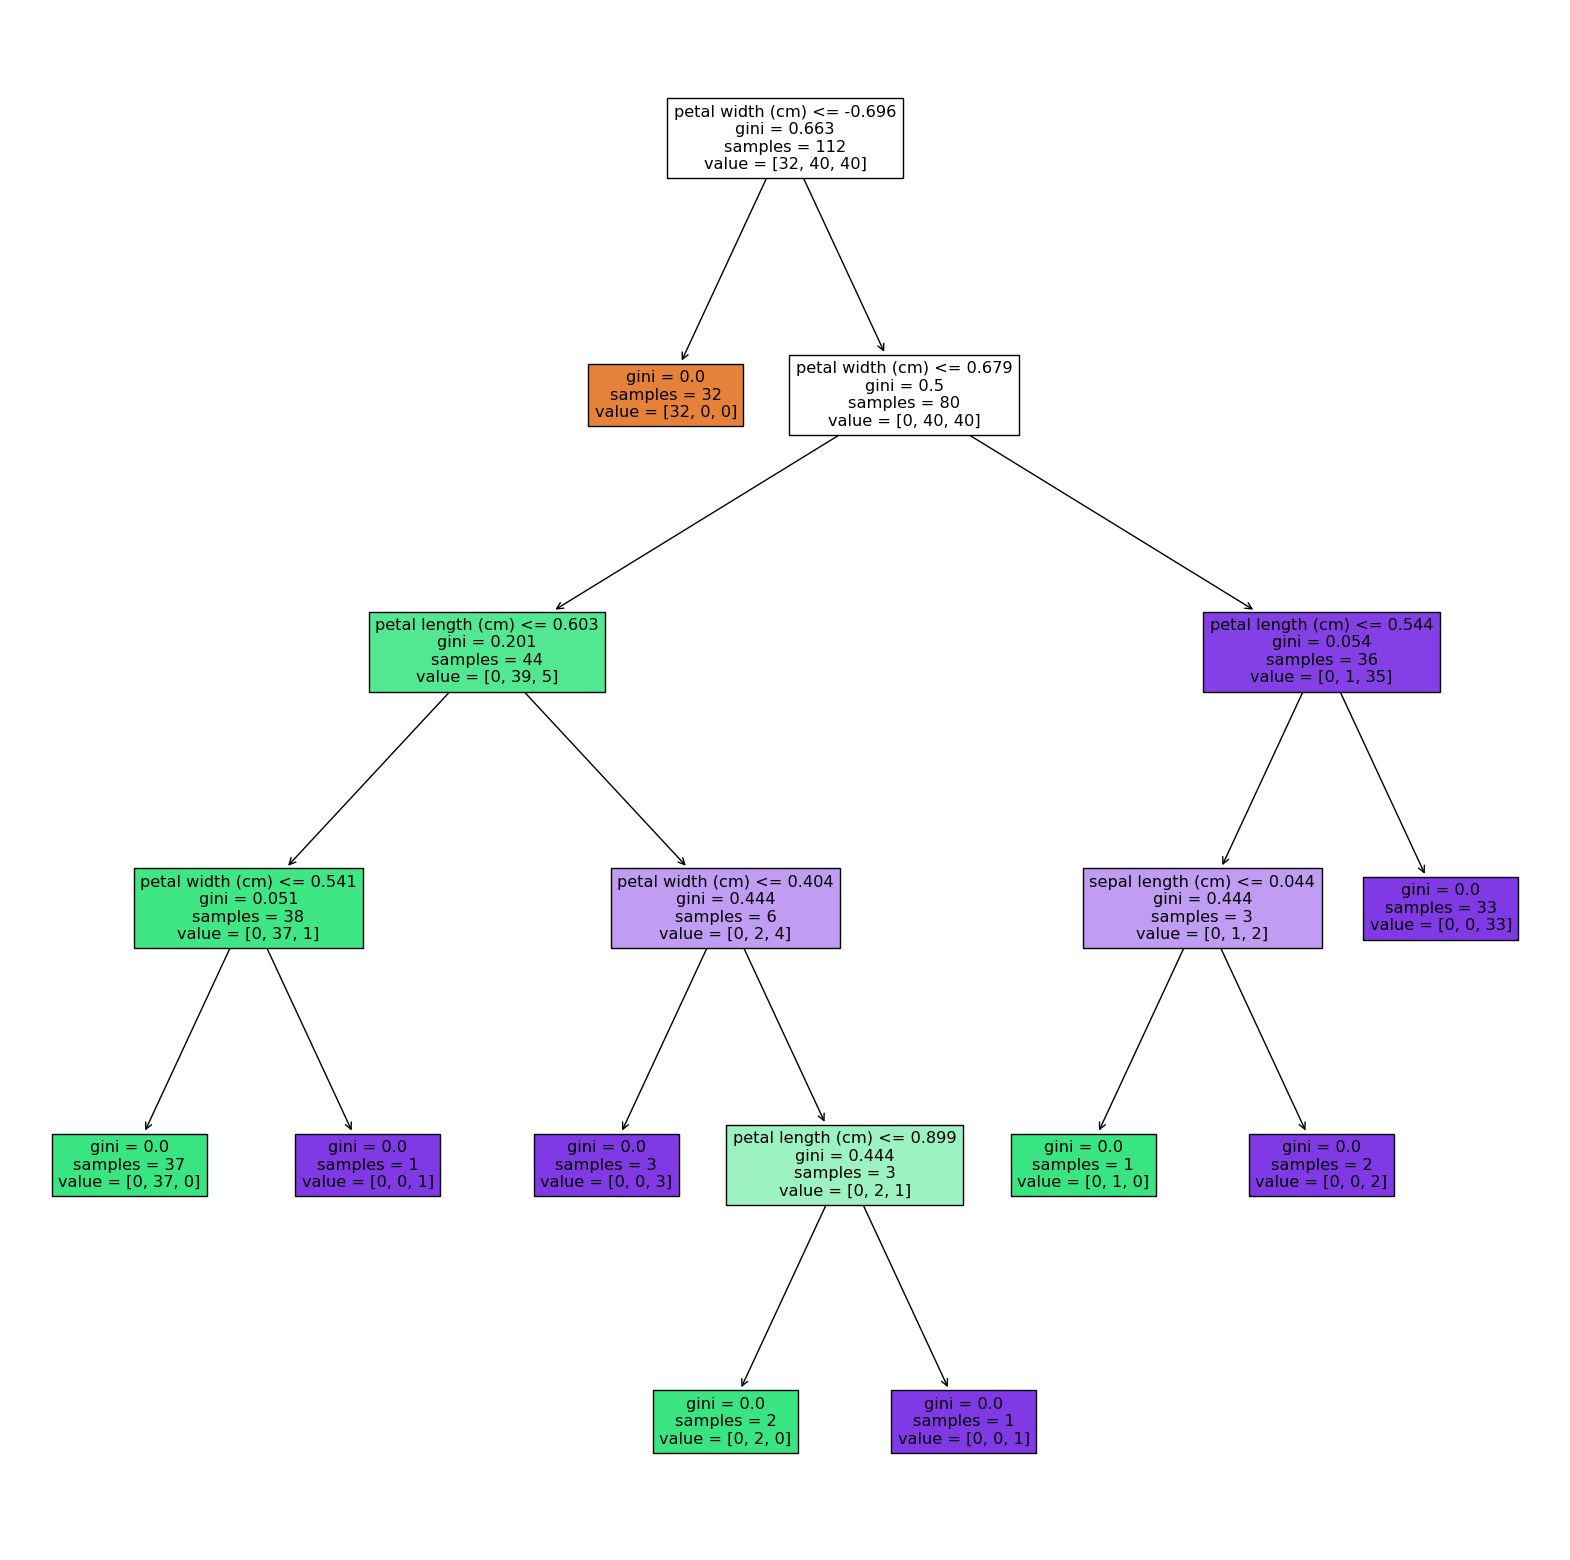

In [57]:
plt.figure(figsize=(20,20))
plot_tree(model, feature_names=iris['feature_names'], filled=True)

In [58]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

1.0
0.8


[Text(0.7774621212121212, 0.9615384615384616, 'Bream <= 0.896\ngini = 0.786\nsamples = 119\nvalue = [24, 8, 43, 15, 14, 10, 5]'),
 Text(0.7471590909090909, 0.8846153846153846, 'Bream <= -1.82\ngini = 0.743\nsamples = 98\nvalue = [3, 8, 43, 15, 14, 10, 5]'),
 Text(0.7168560606060606, 0.8076923076923077, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 9, 0]'),
 Text(0.7774621212121212, 0.8076923076923077, 'Bream <= 1.3\ngini = 0.701\nsamples = 89\nvalue = [3, 8, 43, 15, 14, 1, 5]'),
 Text(0.7471590909090909, 0.7307692307692307, 'Bream <= 0.278\ngini = 0.672\nsamples = 82\nvalue = [3, 8, 43, 8, 14, 1, 5]'),
 Text(0.5852272727272727, 0.6538461538461539, 'Bream <= -0.126\ngini = 0.667\nsamples = 58\nvalue = [3, 8, 29, 0, 14, 1, 3]'),
 Text(0.4431818181818182, 0.5769230769230769, 'Bream <= -0.187\ngini = 0.5\nsamples = 44\nvalue = [0, 2, 29, 0, 11, 1, 1]'),
 Text(0.3409090909090909, 0.5, 'Bream <= -0.594\ngini = 0.537\nsamples = 35\nvalue = [0, 2, 21, 0, 11, 1, 0]'),
 Text(0.22727272727272

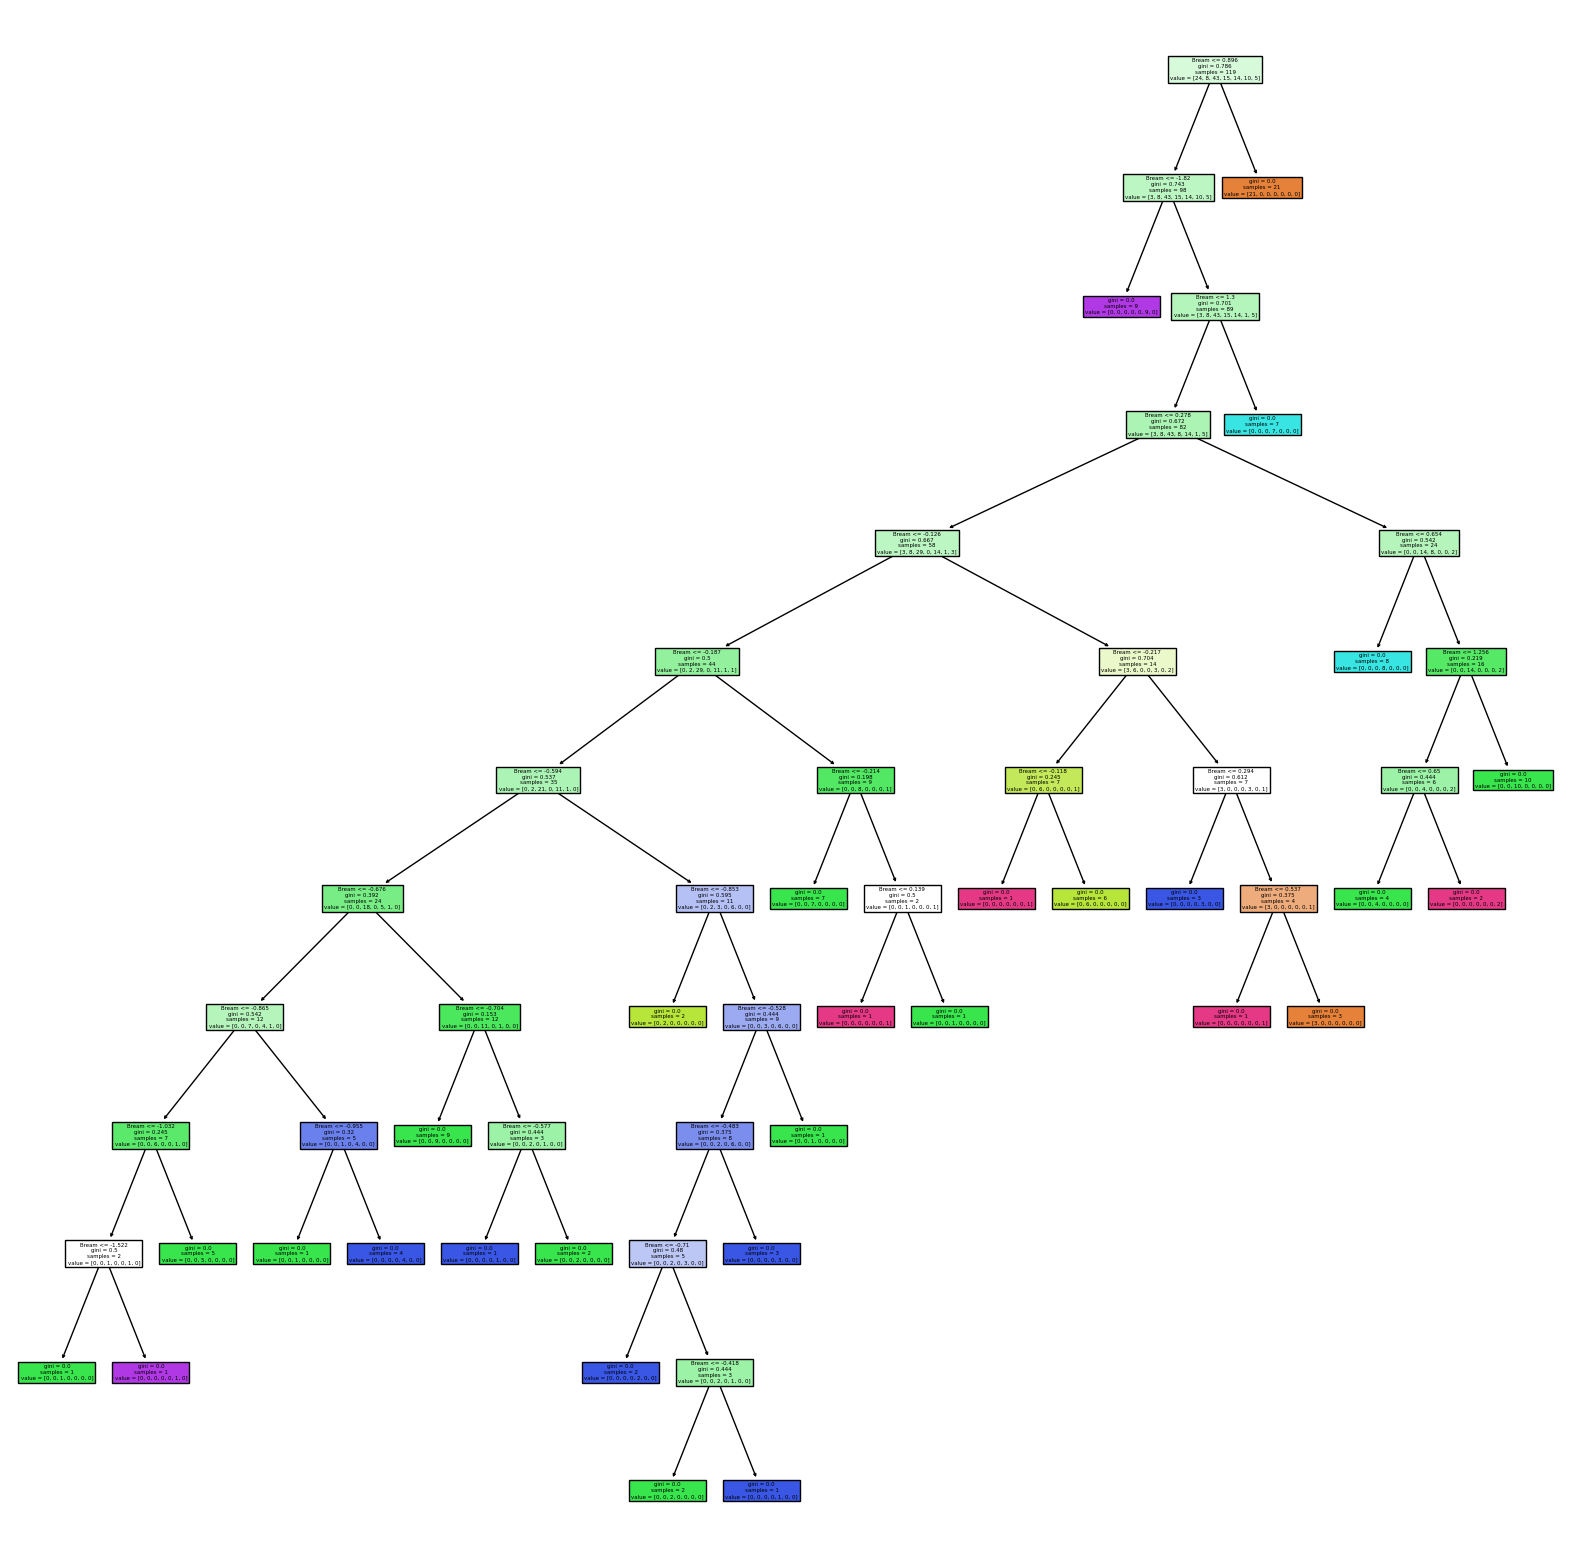

In [86]:
fish2 = pd.read_csv('./data/fish2.csv')
data = fish2.iloc[:,1:]

target = fish2['Species'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data,target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)  # 필요없음

model = DecisionTreeClassifier()
model.fit(train_scaled,train_target)
model.score(test_scaled,test_target)

print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

plt.figure(figsize=(40,40))
plot_tree(model, feature_names=fish2['Species'], filled=True)

1.0
0.8


[Text(0.84375, 0.96875, 'Bream <= 13.201\ngini = 0.781\nsamples = 119\nvalue = [26, 8, 43, 13, 16, 8, 5]'),
 Text(0.8080357142857143, 0.90625, 'Bream <= 3.2\ngini = 0.745\nsamples = 98\nvalue = [5, 8, 43, 13, 16, 8, 5]'),
 Text(0.7723214285714286, 0.84375, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 8, 0]'),
 Text(0.84375, 0.84375, 'Bream <= 44.5\ngini = 0.705\nsamples = 90\nvalue = [5, 8, 43, 13, 16, 0, 5]'),
 Text(0.8080357142857143, 0.78125, 'Bream <= 5.679\ngini = 0.679\nsamples = 84\nvalue = [5, 8, 43, 7, 16, 0, 5]'),
 Text(0.6875, 0.71875, 'Bream <= 36.4\ngini = 0.731\nsamples = 68\nvalue = [5, 8, 29, 7, 16, 0, 3]'),
 Text(0.6517857142857143, 0.65625, 'Bream <= 8.352\ngini = 0.679\nsamples = 61\nvalue = [5, 8, 29, 0, 16, 0, 3]'),
 Text(0.5178571428571429, 0.59375, 'Bream <= 209.0\ngini = 0.487\nsamples = 45\nvalue = [0, 1, 29, 0, 14, 0, 1]'),
 Text(0.42857142857142855, 0.53125, 'Bream <= 6.854\ngini = 0.503\nsamples = 37\nvalue = [0, 1, 22, 0, 14, 0, 0]'),
 Text(0.357142857

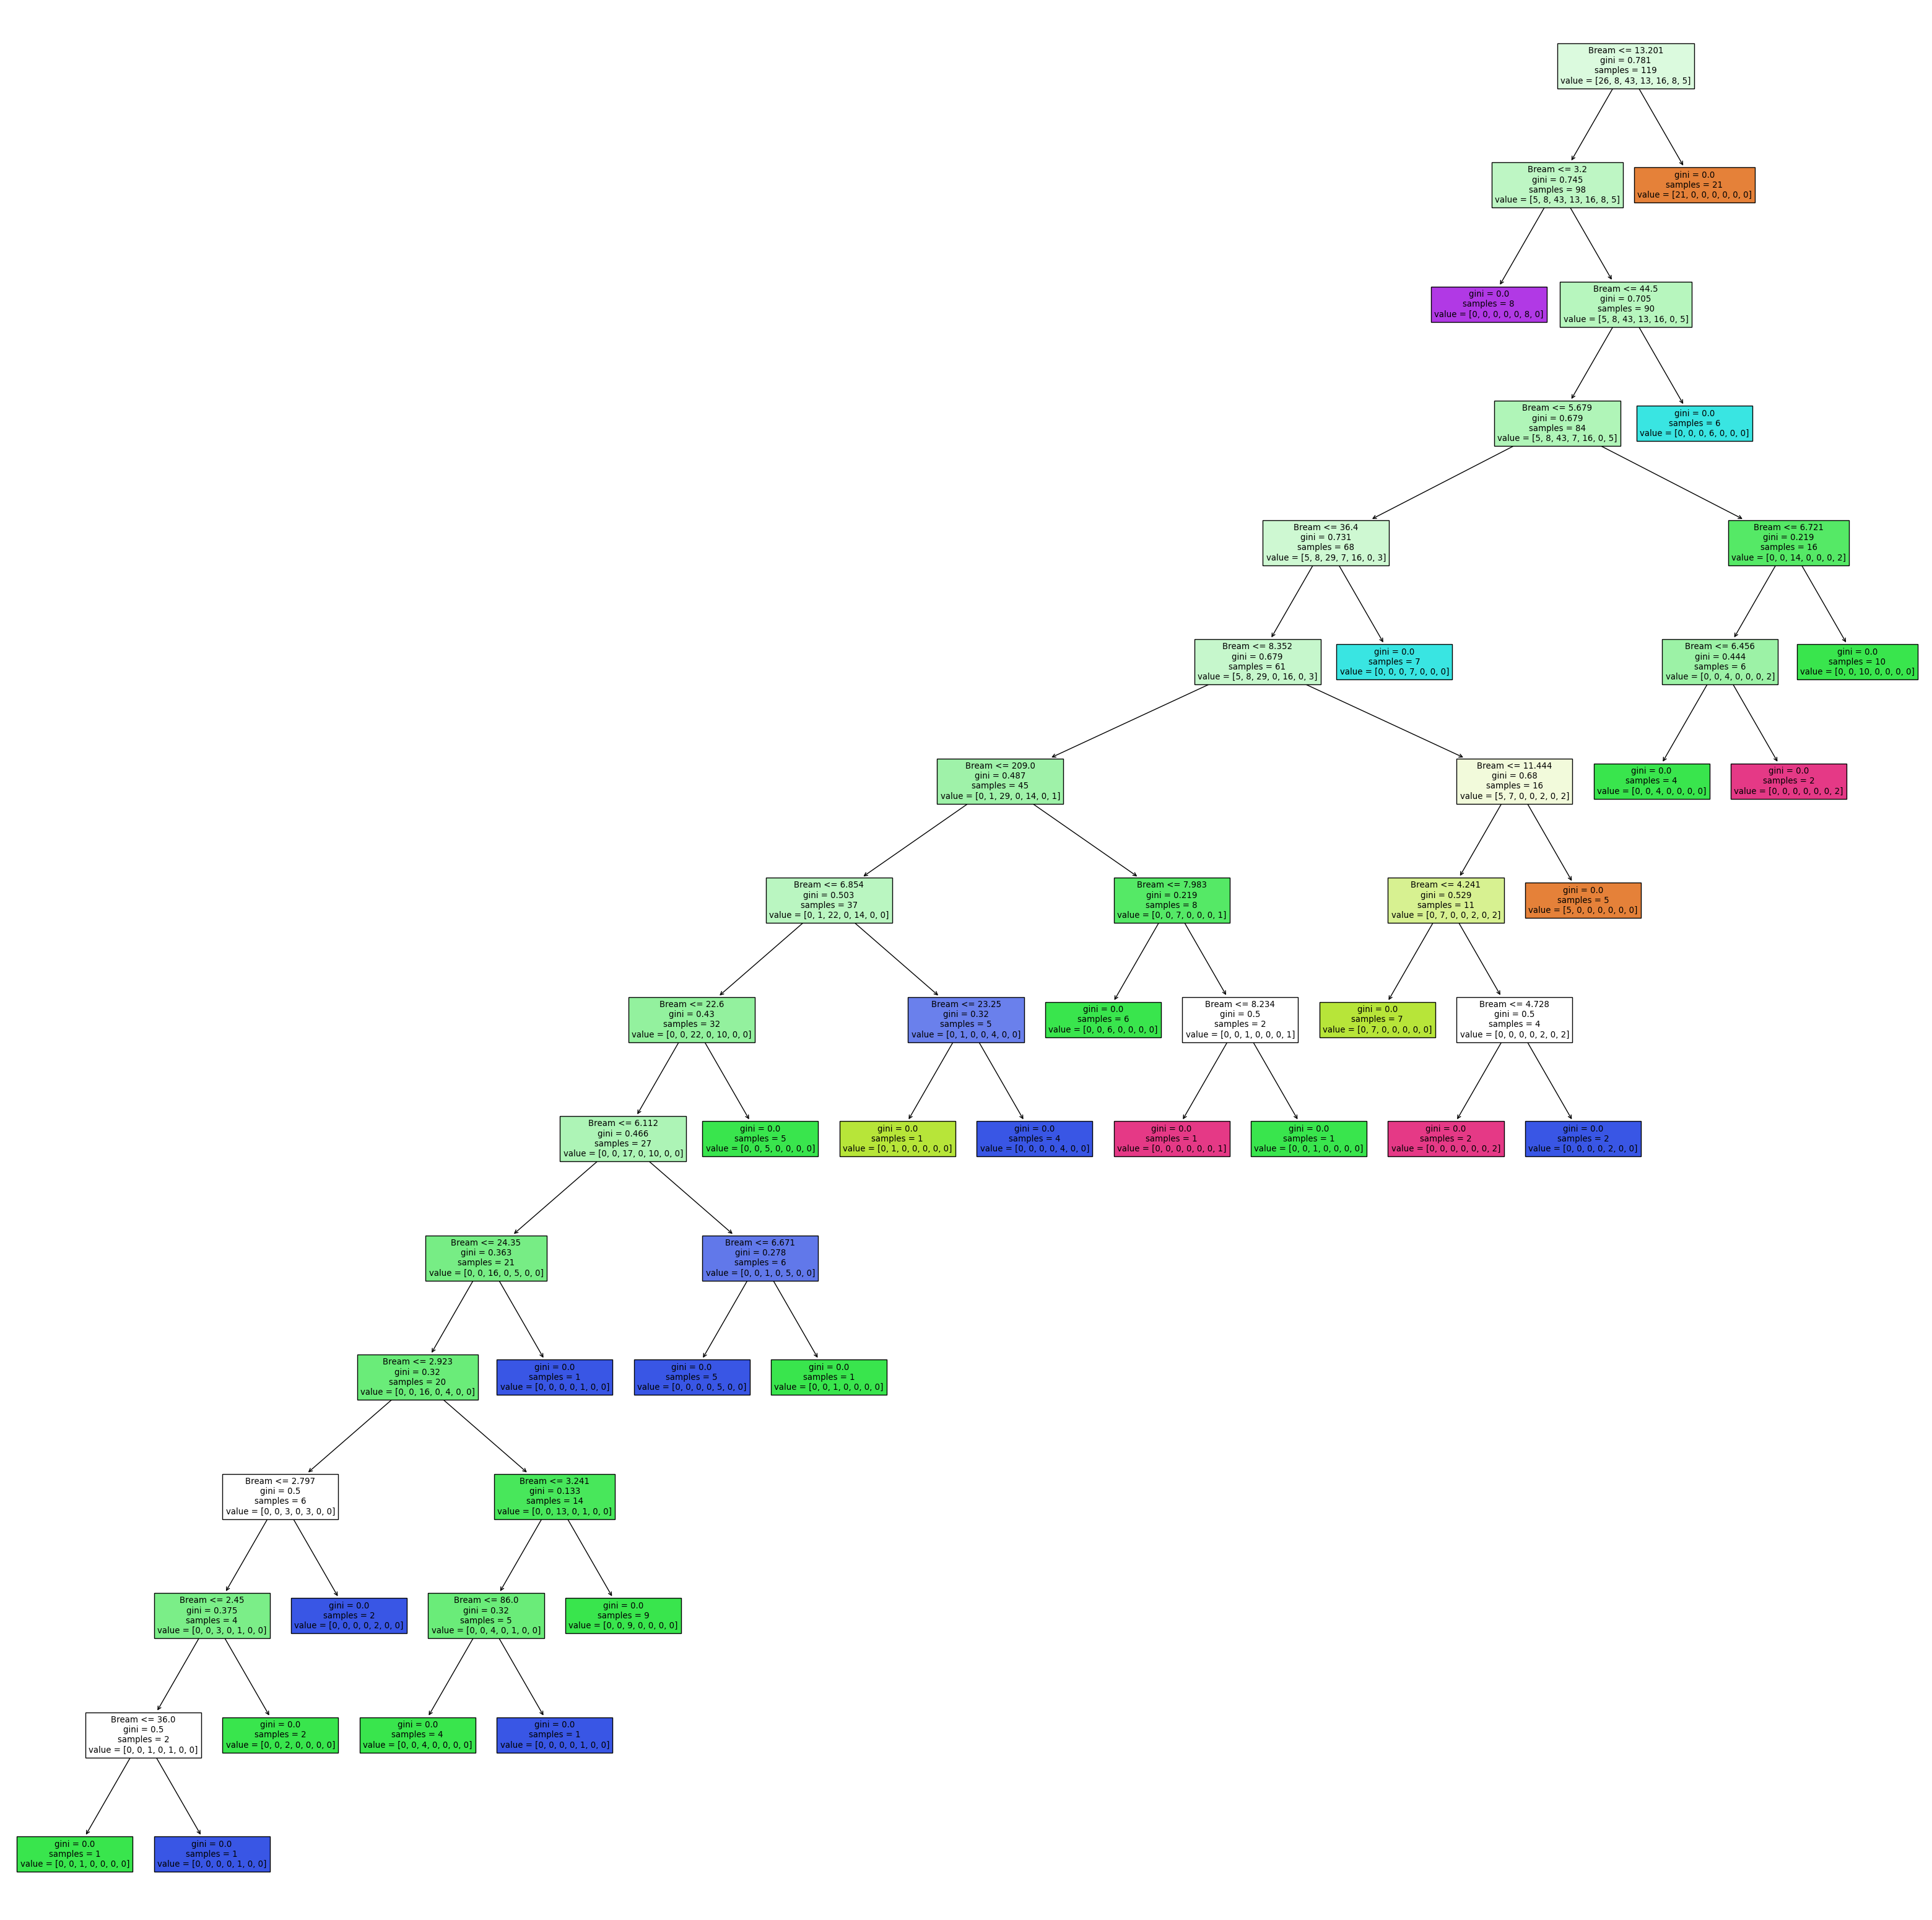

In [121]:
fish2 = pd.read_csv('./data/fish2.csv')
data = fish2.iloc[:,1:]

target = fish2['Species'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data,target)


model = DecisionTreeClassifier()
model.fit(train_input,train_target)
model.score(test_input,test_target)

print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

plt.figure(figsize=(40,40))
plot_tree(model, feature_names=fish2['Species'], filled=True)

In [ ]:
#랜덤 포래스트

iris = load_iris()
data, target = iris['data'], iris['target']

In [127]:
from bs4 import BeautifulSoup
import requests as rq
import pandas as pd
import time
from tqdm import tqdm

dic = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac Os X 13_2)'}

total = []
for i in tqdm(range(1,669)):
    url = rq.get(f'https://finance.naver.com/item/sise_day.naver?code=005930&page={i}', headers = dic)
    html = BeautifulSoup(url.text)

    table = html.find("table")
    total.append(pd.read_html(str(table))[0].dropna())
    time.sleep(0.6)

100%|██████████| 668/668 [07:19<00:00,  1.52it/s]


In [128]:
len(total)

668

In [136]:
sam = pd.concat(total, ignore_index=True)
sam = sam.drop(0)
sam['날짜'] = pd.to_datetime(sam['날짜'])
sam = sam.sort_values(by='날짜')
sam = sam.reset_index(drop=True)

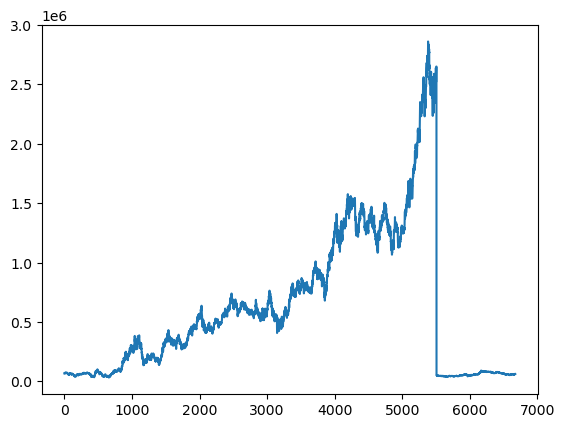

In [137]:
plt.plot(sam['종가'])

In [140]:
del sam['전일비']

In [153]:
train = sam[sam['날짜'].dt.year <= 2021]
test = sam[sam['날짜'].dt.year > 2021]

X_train = []
y_train = []

X_test = []
y_test = []

for i in range(len(train)-1):
    a = list(train.iloc[i, 1:])
    b = train.iloc[i+1,1]
    X_train.append(a)
    y_train.append(b)

for i in range(len(test)-1):
    a = list(train.iloc[i, 1:])
    b = train.iloc[i+1,1]
    X_test.append(a)
    y_test.append(b)
    

In [154]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

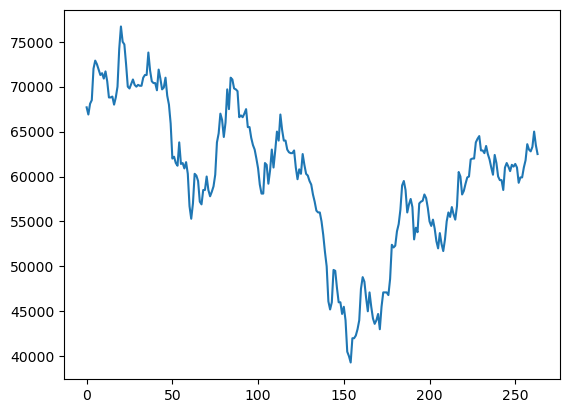

In [155]:
plt.plot(y_test)

In [156]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

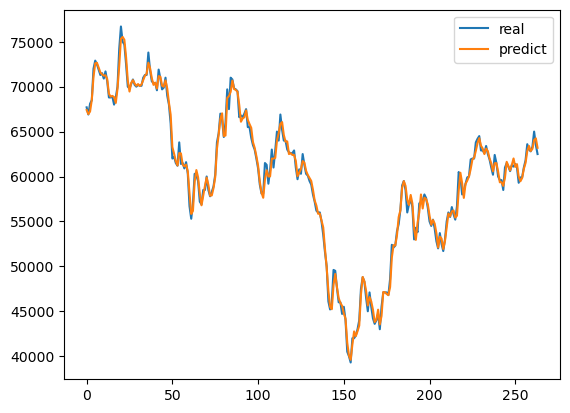

In [157]:
plt.plot(y_test)
plt.plot(rf.predict(X_test))
plt.legend(['real','predict'])

In [160]:
rf.predict([np.array(sam.iloc[-1, 1:]).astype('float')])

array([64462.])

In [167]:
bike = pd.read_csv('./data/bike.csv')
del bike['casual']
del bike['registered']

bike['datetime'] = pd.to_datetime(bike['datetime'])
bike['year'] = bike['datetime'].

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [ ]:
import calendar

box = []
for y, m, d in zip(bike['year'], bike['month'], bike['day']):
    w = calendar.weekday(y,m,d)
    box.append(w)

bike['weekday'] = box

In [185]:
X_data = bike.iloc[:,1:-2]
y_data = bike['count']
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data)


In [188]:
y_train

2437    118
7067    280
1837    140
861      45
8742    274
       ... 
341      83
8337    253
886     124
8764    253
8032     51
Name: count, Length: 8164, dtype: int64

In [190]:
rf = RandomForestRegressor(oob_score= True)
rf.fit(X_train,y_train)
rf.oob_score_

0.25036382029325144